<a href="https://colab.research.google.com/github/Nolanole/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Josh_Mancuso_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns
%matplotlib inline

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

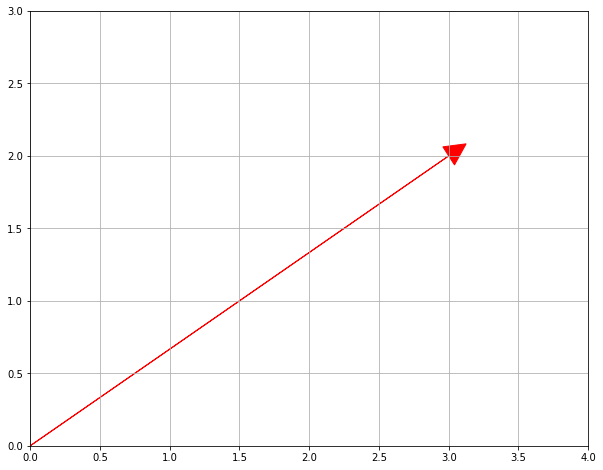

In [2]:
a = np.array([3,2])

fig, ax = plt.subplots(figsize=(10,8))

plt.arrow(0,0, a[0], a[1], head_width=.15, head_length=0.15, color='red')
ax.grid(True)
plt.xlim(-0,4)
plt.ylim(-0,3)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


The norm of a vector represents its length

In [3]:
b = np.array([17, -4, -2, 1])
b_norm = np.linalg.norm(b)

b_norm

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

c_dot_d = np.dot(c,d)

c_dot_d

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.matrix('7 4 2; 1 3 -1; 2 6 -4')

E_inverse = np.linalg.inv(E)
E_transpose = E.T

In [6]:
E_inverse

matrix([[ 0.17647059, -0.82352941,  0.29411765],
        [-0.05882353,  0.94117647, -0.26470588],
        [ 0.        ,  1.        , -0.5       ]])

In [7]:
E_transpose

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

In [8]:
#just for fun, E * E_inv should = identity matrix:
np.matmul(E, E_inverse)

matrix([[ 1.00000000e+00,  4.44089210e-16,  0.00000000e+00],
        [ 3.46944695e-17,  1.00000000e+00,  1.11022302e-16],
        [ 6.93889390e-17, -4.44089210e-16,  1.00000000e+00]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [9]:
#import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [10]:
cust_mean = df.customers.mean()
cust_mean

1135.7142857142858

In [11]:
cust_stdev = df.customers.std()
cust_stdev

314.26406851866597

In [12]:
cust_var = cust_stdev**2
cust_var

98761.90476190478

In [13]:
snow_mean = df.snow.mean()
snow_mean

2.7142857142857144

In [14]:
snow_stdev = df.snow.std()
snow_stdev

2.9277002188455996

In [15]:
snow_var = snow_stdev**2 
snow_var

8.571428571428571

In [16]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In order to compare variances between snow and customers, we need to consider the standard deviations relative to their respective means, rather than just looking at the absolute values (because in an absolute sense, the number of customers is much larger than the amount of snow, so the varaince numbers are also much larger).

Lets compare the stdev relative to the mean for both groups:

In [17]:
cust_stdev / cust_mean

0.27671050058247315

In [18]:
snow_stdev / snow_mean

1.0786263964168

The higher number for the  standard deviation of snow, relative to its mean, compared to the cust_stdev relative to its mean, indicates a much higher spread of values (aka higher variance) for snow.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [19]:
#covariance matrix:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [0]:
covar = 670.238095

In [21]:
#corr coefficient:
r = covar / (cust_stdev * snow_stdev)
r

0.7284634642142921

In [22]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [23]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [24]:
#convert to numpy array, skip country column:

X = df.iloc[:, 1:].values
X

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

In [25]:
#Scale w StandardScaler function:

scaled_X = StandardScaler().fit_transform(X)
scaled_X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [26]:
# create the 2 componenent PCA instance
pca = PCA(2)

principal_components = pca.fit_transform(scaled_X)

#convert to pandas df:

pca_df = pd.DataFrame(data=principal_components, columns = ['component_1', 'component_2'])
pca_df

,component_1,component_2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


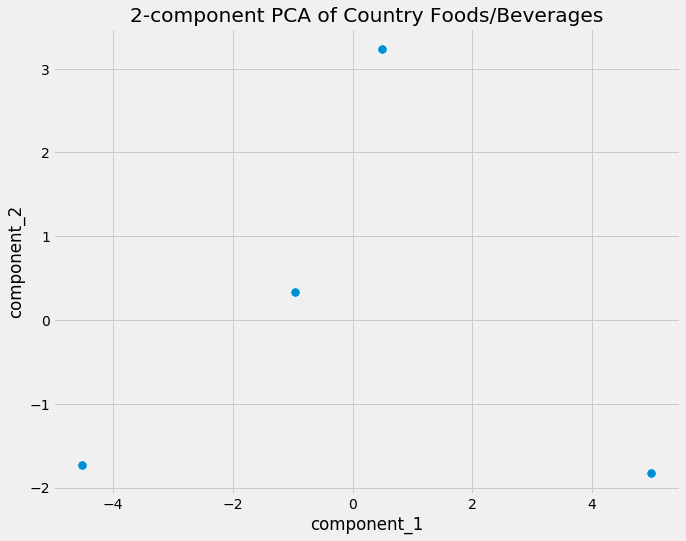

In [38]:
#plot:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('2-component PCA of Country Foods/Beverages')
sns.scatterplot(x=pca_df.component_1, y=pca_df.component_2, s=90, ax=ax)
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [28]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


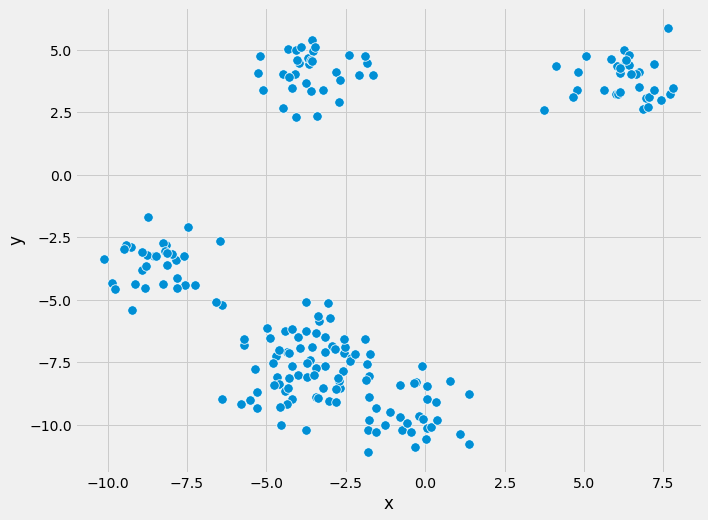

In [29]:
#plot and inspect for visual cues for number of clusters:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=points.x, y=points.y, s=90, ax=ax)
plt.show()

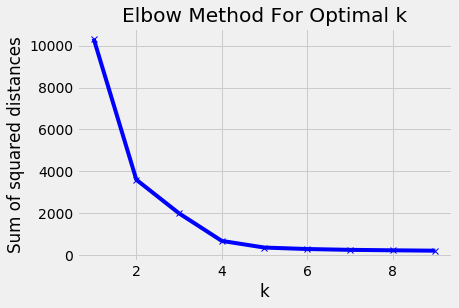

In [30]:
#plot elbow graph to determine number of clusters:

sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

###Looks like 4 or 5 is the optimal number of clusters

In [0]:
#cluster into 4 groups

kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_

In [32]:
# Add our new labels to the dataframe

new_series = pd.Series(labels)
points['labels'] = new_series
points.head()

,x,y,labels
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,0
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


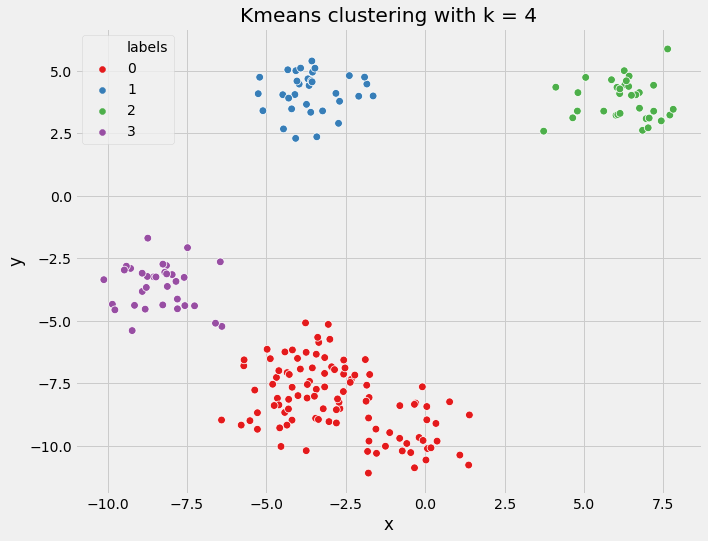

In [35]:
#plot and inspect for visual cues for number of clusters:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.color_palette("Set1", n_colors=4)
sns.scatterplot(x=points.x, y=points.y, hue=points.labels, s=60, ax=ax, palette=colors)
ax.set_title('Kmeans clustering with k = 4')
plt.show()

Repeat these steps for 5 clusters:

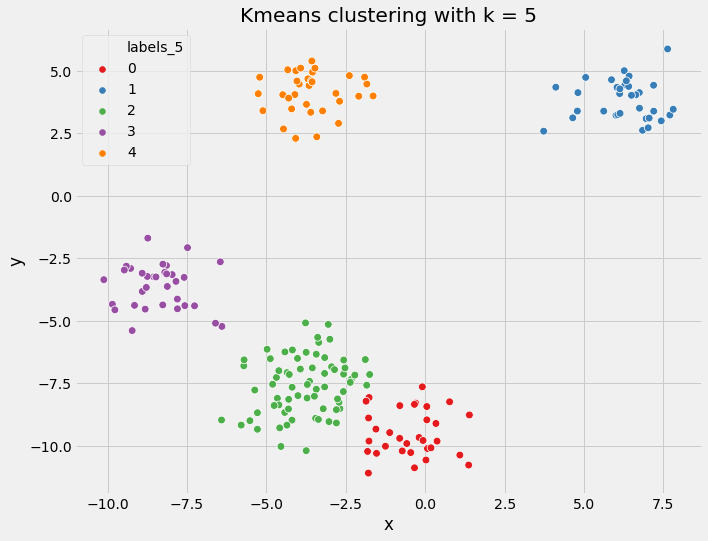

In [36]:
#cluster into 5:

kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_

#add the labels to df:

new_series = pd.Series(labels)
points['labels_5'] = new_series

#plot

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.color_palette("Set1", n_colors=5)
ax.set_title('Kmeans clustering with k = 5')
sns.scatterplot(x=points.x, y=points.y, hue=points.labels_5, s=60, ax=ax, palette=colors)
plt.show()
